In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

## Day 4 Action Items

In [2]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [3]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
df.shape

(450, 26)

In [5]:
# 1. number of different companies
# I'll find the unique company names, which returns a list, and then 
# I'll get the length of it
print(r'unique companies in dataframe:', len(df['Company Name'].unique()))
# you also might have been asking for the size of the dataframe, and then I'd do
print(r'total entries in dataframe:', len(df))

unique companies in dataframe: 439
total entries in dataframe: 450


In [6]:
#2. number of jobs created for buisnesses in Queens
# Here I'll group by Borough and then look at the sum of the jobs 
# created in each brorough. Since I only care about Queens, I can 
# look that value up from the series created by the groupby and sum 
# methods
print(r'jobs created by buisnesses in Queens:',df.groupby('Borough')['Job created'].sum()['Queens'])

jobs created by buisnesses in Queens: 102.0


In [7]:
# 3. number of unique email addresses
# I'll find the unique company email addresses, which returns a list,
# and then I'll get the length of it
print(r'number of unique email addresses:', len(df['company email'].unique()))

number of unique email addresses: 421


In [8]:
# 4. Consider the NTAs with at least 5 buisnesses listed. Then find the 
# average total savings and total jobs created for each NTA.
# I make want to see how many buisnesses there are in each NTA, so I 
# group by NTA and then count up all the times that NTA occurs
df.groupby('NTA')[['NTA']].value_counts()

NTA
Astoria                               3
Baisley Park                          1
Battery Park City-Lower Manhattan     9
Bedford                               3
Bensonhurst West                      1
                                     ..
Whitestone                            3
Williamsburg                          1
Windsor Terrace                       1
Woodside                              3
park-cemetery-etc-Brooklyn           15
Length: 79, dtype: int64

In [9]:
# I can make this into a filter that says I need at least 5 values to
# include the NTA
filt = (df.groupby('NTA')[['NTA']].value_counts() >= 5)

In [10]:
# here I apply my filter onto my Total Savings and Job created means
# for each NTA. With out the filter I'd get values starting with Astoria, 
# and Baisley Park, but with the filter, the first NTA is Battery Park
df_NTA = df.groupby('NTA')[['Total Savings', 'Job created']].mean()[filt]
df_NTA =df_NTA.rename(columns={'Total Savings':'Average Savings', 'Job created':'Average jobs created'})
df_NTA

,Average Savings,Average jobs created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,NaN
Bushwick South,26140.455000,10.000000
Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
College Point,17159.372857,2.000000
Crown Heights North,4036.298889,NaN
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN
East New York,48433.093333,15.000000
East Williamsburg,13990.626364,NaN
Greenpoint,9753.649286,NaN


In [11]:
# 5. Save results to the previous question as a csv file
df_NTA.to_csv('Milestone_Action_Item_day_4.csv')

## Day 5 Action Items

In [12]:
path1 = '/Users/hminsky/Desktop/The Data Incubator/Day 4/Milestone_Action_Item_day_4.csv'
df_day_4 = pd.read_csv(path1)

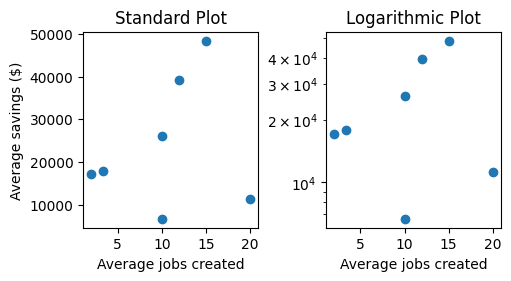

In [13]:
# 2a. Scatter plots from results of day 4 (average 
# total savings and average jobs created) plotted
# on a standard and logorithmic scale
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = df_day_4['Average jobs created']
data = df_day_4['Average Savings']
axs[0].scatter(xdata, data)

axs[1].set_yscale('log')
axs[1].scatter(xdata, data);
axs[0].set_xlabel('Average jobs created')
axs[1].set_xlabel('Average jobs created')
axs[0].set_ylabel('Average savings ($)')
axs[0].set_title('Standard Plot')
axs[1].set_title('Logarithmic Plot');

In [14]:
# 2b. Make a histogram of the log of the average 
# total savings
df_day_4['log of Average Savings'] = np.log(df_day_4['Average Savings'])

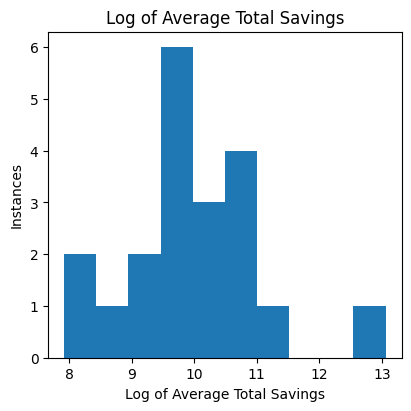

In [15]:
fig, ax = plt.subplots(figsize=(4, 4), layout = 'constrained')
n, bins, patches = ax.hist(df_day_4['log of Average Savings'],10)#, 50, density = True, facecolor = 'C0', alpha=0.75)

ax.set_xlabel('Log of Average Total Savings')
ax.set_ylabel('Instances')
ax.set_title('Log of Average Total Savings');

In [16]:
# 2c. A log plot of the total jobs created each month
df['Dates'] = pd.to_datetime(df['Effective Date'])#, format='%m/%d/%y')
# type(df.loc[0,'Dates'])
df = df.set_index('Dates')
# df.head(20)
df_dates_jobs = df['Job created']
print(df_dates_jobs)
df_dates_jobs_resamp = df_dates_jobs.resample('M').sum()
print(df_dates_jobs_resamp)

Dates
2005-03-04     NaN
2008-04-02     NaN
2015-01-05     NaN
2020-02-03     NaN
2017-06-30     NaN
              ... 
2008-12-09    10.0
2017-12-05     NaN
2018-08-03     NaN
2016-01-26     NaN
2019-10-03     NaN
Name: Job created, Length: 450, dtype: float64
Dates
1993-02-28    15.0
1993-03-31     0.0
1993-04-30     0.0
1993-05-31     0.0
1993-06-30     0.0
              ... 
2020-03-31     0.0
2020-04-30     0.0
2020-05-31     0.0
2020-06-30     0.0
2020-07-31     0.0
Freq: M, Name: Job created, Length: 330, dtype: float64


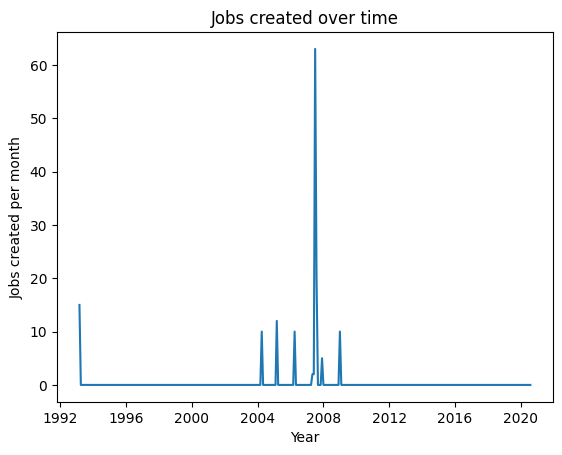

In [18]:
plt.plot(df_dates_jobs_resamp)
plt.title('Jobs created over time')
plt.xlabel('Year')
plt.ylabel('Jobs created per month');